#**Análise Exploratória de Dados - Trabalhos e Salarios na Ciência de Dados.**

**Informações das colunas**
 - 'work_year': ano que o dado foi registrado, indica temporalidade, importante
  para entender os salários ao longo do tempo.

 - 'job_title': é o nome específico do cargo, ideal para entender a distribuição salarial entre diversos cargos especializados.

 - 'job_category': é a classificação do cargo em uma categoria, facilitando a análise.

 - 'salary_currency': corresponde ao salário atual recebido pela pessoa que pode ser em diversas moedas diferentes (doláres, euros, etc).

 - 'salary': é o valor recebido em uma determinada moeda.

 - 'salary_in_usd': corresponde ao valor do salário atual padronizado para o dólar, ideal para realizar comparações globais.

 - 'employee_residence': corresponde ao país onde a pessoa reside.

 - 'experience_level': é o nível de experiência da pessoa, interessante para retirar insights relacionados ao salário em relação ao nível de experiência.

 - 'employment_type': é como o trabalho foi acordado: CLT, PJ, Contrato, etc. Ideal para explorar como os diferentes tipos de trabalho afetam a estrutura salarial.

 - 'work_setting': é a configuração do trabalho: home-office, presencial ou hibrido. Também serve para analisar como cada configuração afeta a estrutura dos salários.

 - 'company_location': localização da empresa, pode ajudar também na análise dos salários e como cada localidade interfere no dinheiro.

 - 'company_size':  tamanho da empresa (pequena, média ou grande) também pode afetar os salários de acordo com o seu tamanho.


##**1 - Leitura da base e entendimento dos dados.**

In [1]:
#Importação das bibliotecas essenciais
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#Leitura do dataset
dt = pd.read_csv('/content/drive/MyDrive/DFs /jobs_in_data.csv')
dt.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [3]:
# Dimensão do dataset: linha x coluna
dt.shape

(9355, 12)

In [4]:
# Tipos de dados de cada coluna
dt.dtypes

work_year              int64
job_title             object
job_category          object
salary_currency       object
salary                 int64
salary_in_usd          int64
employee_residence    object
experience_level      object
employment_type       object
work_setting          object
company_location      object
company_size          object
dtype: object

Todos os tipos dos dados estão em conformidade.

In [5]:
dt.isnull().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

Nenhum valor nulo

In [6]:
dt.duplicated().sum()

4014

Há possívelmente, 4.014 valores repetidos. No entanto, não assumirei nenhuma premissa porque valores duplicados nesse dataset são relativos no sentido de: uma pessoa pode haver o mesmo cargo na área de dados, o mesmo salário, pode ter sido registrado no mesmo ano, morar no mesmo país, trabalhar na mesma empresa, etc.

### **Ajustes para uma compreensão melhor em português**

In [7]:
# Renomeação das colunas para o português.
dt.rename(columns={'salary_in_usd': 'salario_em_dolares',
                   'experience_level': 'nivel_experiencia',
                   'salary_currency': 'moeda_salarial',
                   'salary': 'salario',
                   'employee_residence': 'pais_onde_reside',
                   'employment_type': 'tipo_contratacao',
                   'work_setting': 'configuracao_trabalho',
                   'company_location': 'localizacao_empresa',
                   'company_size': 'tamanho_empresa',
                   'work_year': 'ano_trabalho',
                   'job_title': 'nome_cargo',
                   'job_category': 'categoria_cargo'},
          inplace=True)

In [8]:
# Tradução do nível de experiência para melhor assimilação gráfica
substituicoes = {'Mid-level': 'Pleno',
                 'Entry-level': 'Junior',
                 'Executive': 'Executivo'}

dt['nivel_experiencia'] = dt['nivel_experiencia'].replace(substituicoes)

#**2 - Análise dos salários em doláres**

In [9]:
# Estilo do gráfico seaborn
sns.set_style("darkgrid")

# Paleta seaborn
sns.set_palette("deep")

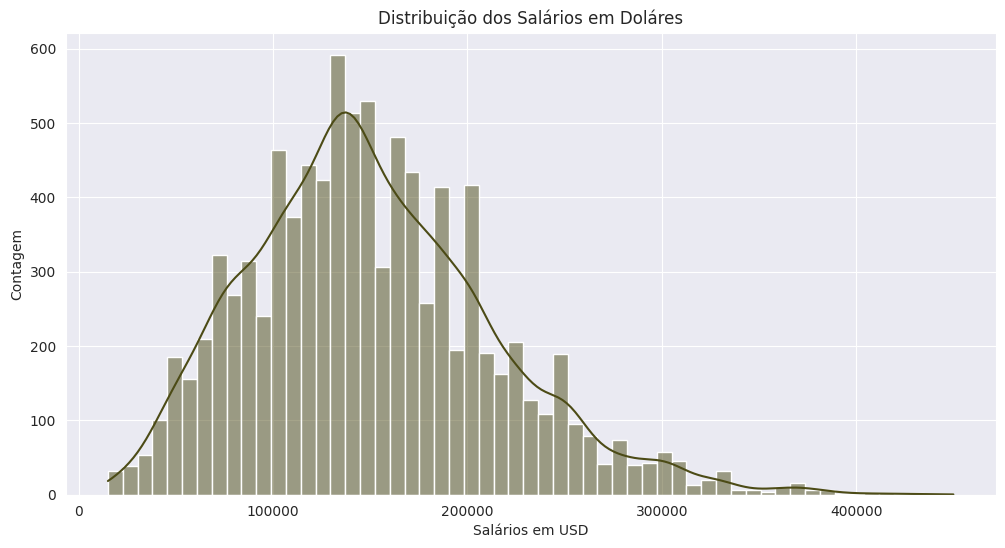

In [10]:
# Plotagem para análise visual da distribuição.

plt.figure(figsize=(12,6))
sns.histplot(data=dt, x='salario_em_dolares', kde=True, color="#4C4B16")

plt.title("Distribuição dos Salários em Doláres")
plt.xlabel("Salários em USD")
plt.ylabel("Contagem")

plt.show()


Trata-se de uma **distribuição assimetrica à direita**.

Isto é, possívelmente a **média dos salários** em dólares sofrerá com a influência dos salários altos.

Podemos chegar na conclusão que o salário médio anual em doláres de um cientista de dados, visualmente falando, está concentrado na faixa entre 100 e 200 mil doláres.

In [11]:
# Descrição estatística da coluna do salário em dólares.
salarios_usd = dt['salario_em_dolares']
salarios_usd.describe()

count      9355.000000
mean     150299.495564
std       63177.372024
min       15000.000000
25%      105700.000000
50%      143000.000000
75%      186723.000000
max      450000.000000
Name: salario_em_dolares, dtype: float64

In [12]:
mediana_salarios_usd = np.median(salarios_usd)
mediana_salarios_usd

143000.0

###**Detecção de Outliers - IQR**

<Axes: ylabel='salario_em_dolares'>

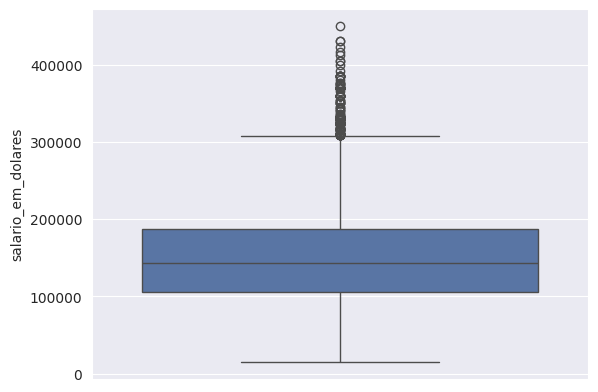

In [13]:
sns.boxplot(salarios_usd)

O boxplot acusa muitos outliers na distribuição dos salários em dólares, vamos realizar o método de encontrar os Outliers utilizando o **intervalo interquartil**.

In [14]:
# Cálculo IQR.

# Ordenando em ordem crescente.
salarios_usd = salarios_usd.sort_values()

# Quantidade dos salários
salarios_qtd = len(salarios_usd)

In [15]:
def calculo_iqr(lista):
    q1 = np.percentile(lista, 25)
    q3 = np.percentile(lista, 75)
    iqr = q3 - q1

    return q1, q3, iqr

In [16]:
def calculo_outliers(lista):
  q1, q3, iqr = calculo_iqr(lista)

  #Limite inferior e superior
  limite_inferior = q1 - (1.5 * iqr)
  limite_superior = q3 + (1.5 * iqr)
  print(f'Limites: [{limite_inferior} - {limite_superior}]')

  outliers_min = [elemento for elemento in lista if elemento < limite_inferior]
  outliers_max = [elemento for elemento in lista if elemento > limite_superior]


  outliers = outliers_min + outliers_max
  return outliers


In [17]:
salarios_usd_outliers = calculo_outliers(salarios_usd)
len(salarios_usd_outliers)
#salarios_usd_outliers

Limites: [-15834.5 - 308257.5]


158

Pelos cálculos IQR, há 158 valores considerados possíveis Outliers que correspondem à **salários maiores que 308.257,5 dólares anuais**, visto que não há a possibilidade de uma pessoa ganhar 0 dólares anuais trabalhando.

Por enquanto, não considerarei tais valores como Outliers de fato, pois o o maior salário registrado está na faixa de 400 mil dólares anuais que não é um valor extremamente alto, visto que há registros de cargos executivos cujo a remuneração é altissíma.

Aqui há inúmeras possibilidades das variações salariais, por exemplo: se é CLT ou PJ, moeda do país, o cargo, tamanho da empresa, etc. Por isso, realizarei uma análise por **subgrupos.**

##**2.1 - Análise Salarial por Experiência**

In [18]:
experiencia_salario_grupo = dt.groupby('nivel_experiencia')[['salario_em_dolares']].mean().sort_values(by='salario_em_dolares').reset_index()
#experiencia_salario_grupo['salario_em_dolares'] = experiencia_salario_grupo['salario_em_dolares'].apply("{0:.2f}".format)
experiencia_salario_grupo

,nivel_experiencia,salario_em_dolares
0,Junior,88534.776210
1,Pleno,117523.918138
2,Senior,162356.126099
3,Executivo,189462.914591


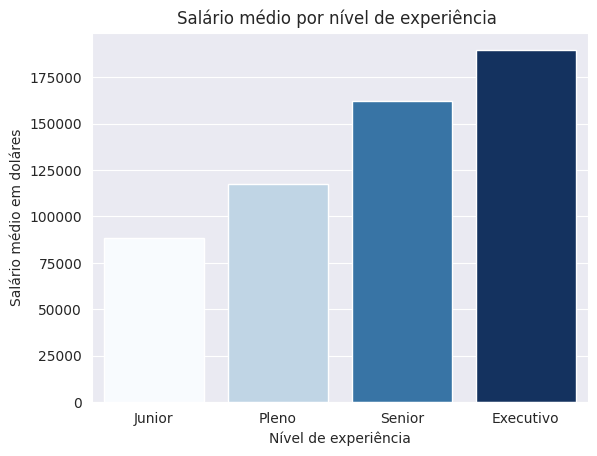

In [19]:
fig= sns.barplot(x=experiencia_salario_grupo['nivel_experiencia'],
                y=experiencia_salario_grupo['salario_em_dolares'],
                hue=experiencia_salario_grupo['salario_em_dolares'],
                palette="Blues",
                legend=False
                )

plt.title('Salário médio por nível de experiência ')
plt.xlabel('Nível de experiência')
plt.ylabel('Salário médio em doláres')
plt.show(fig)

Pelo gráfico de barras, há uma vísivel diferença entre os valores médios salariais conforme o nível de experiência aumenta, oque pode corroborar para um **padrão estar acontecendo.** Uma forma de verificar essa diferença entre as diferentes experiências, é compararmos os boxplots e realizarmos testes de hipótese que corroboram a idéia de que há uma diferença *significante* entre juniores, plenos, sêniores e executivos.

In [20]:
# Lista de níveis de experiência
exp_lista = experiencia_salario_grupo['nivel_experiencia'].unique()

Text(0, 0.5, 'Salários em Dólar')

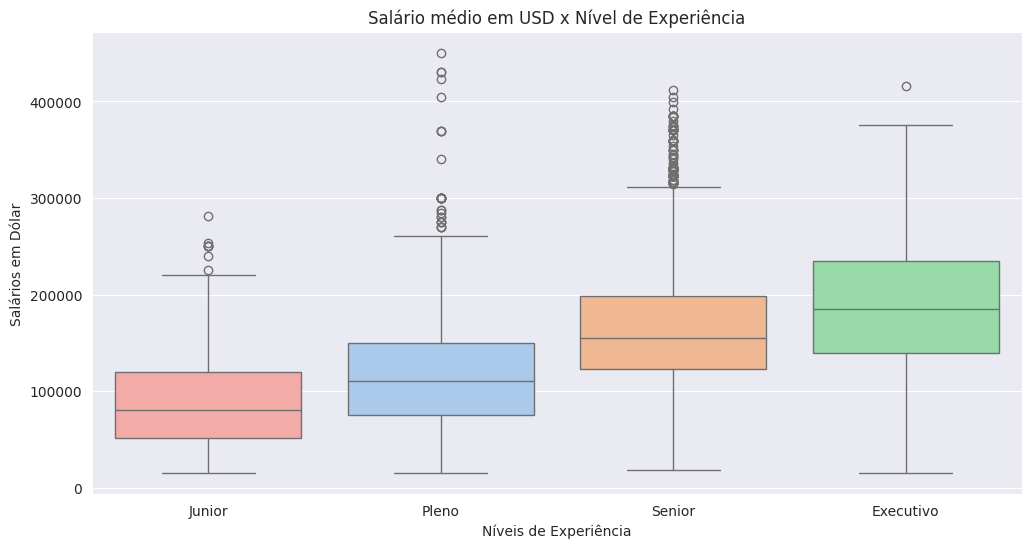

In [21]:
# Plotagem dos diferentes boxplots para avaliação de diferentes variáveis categóricas.

plt.figure(figsize=(12,6))
sns.boxplot(data=dt, x='nivel_experiencia', y='salario_em_dolares', order=exp_lista, hue= 'nivel_experiencia', legend=False, palette='pastel')

plt.title('Salário médio em USD x Nível de Experiência')
plt.xlabel('Níveis de Experiência')
plt.ylabel('Salários em Dólar')

Agora, com a plotagem dos boxplots para cada variável categórica (níveis de experiência), desconsiderando os outliers, conseguimos observar que quanto maior o nível de experiência, maior será o salário do profissional na área de dados.

Um exemplo disso é, ao comparar o boxplot dos plenos e o boxplot dos seniores, temos que **50% dos salários dos sêniores são maiores que 50% dos maiores salários dos plenos**.

Agora, resta saber se, a diferença de salário entre diferentes níveis é significativa, para isso, vou realizar os testes de hipótese.

É importante salientar que os testes de hipótese podem ser feitos porque mesmo cada distribuição por nível de experiência possuindo uma **assimetria à direita**, se utilizarmos as médias de cada distribuição e, assegurarmos que nossa amostra é grande o suficiente, teremos embasamento no **Teorema Central do Limite** para a realização dos testes.

Qual é a nossa hipótese nula?
 - *H0:* A média salarial em dólares dos dois níveis de experiência são iguais:
      
  - junior e pleno;
      
  - junior e senior;
      
  - junior e executivo;

  - pleno e senior;

  - pleno e executivo;

  - senior e executivo.

- *H1:* A média salarial em dólares entre dois níveis de experiência diferentes não são iguais, ou seja, um nível tende a receber maior que o outro em média.

In [22]:
# Testes de hipótese.

df_junior = dt.loc[dt['nivel_experiencia'] == 'Junior', 'salario_em_dolares']
df_pleno = dt.loc[dt['nivel_experiencia'] == 'Pleno', 'salario_em_dolares']
df_senior = dt.loc[dt['nivel_experiencia'] == 'Senior', 'salario_em_dolares']
df_executivo = dt.loc[dt['nivel_experiencia'] == 'Executivo', 'salario_em_dolares']

Eu optei por não utilizar o teste Anova, porque por mais que ele diga se há significância entre os 4 níveis, ele não informa onde há essa diferença significante. Portanto, será um pouco mais verboroso realizar 6 testes normais diferentes mas saberemos entre quais pares de níveis de experiência podemos assegurar uma diferença significante, se houver alguma.

*Estou supondo que os desvios-padrão populacionais desconhecidos são diferentes e que o nível de significância é de 5%*.

Se os valores encontrados utilizando a distribuição T forem menores que 0,05 rejeitamos a *H0*.


In [23]:
# Utilizando a biblioteca stats e realizando os T.H para cada combinação possível.
teste_junior_pleno = stats.ttest_ind(df_junior, df_pleno, equal_var=False)
teste_junior_senior = stats.ttest_ind(df_junior, df_senior, equal_var=False)
teste_junior_executivo = stats.ttest_ind(df_junior, df_executivo, equal_var=False)
teste_pleno_senior = stats.ttest_ind(df_pleno, df_senior, equal_var=False)
teste_pleno_executivo = stats.ttest_ind(df_pleno, df_executivo, equal_var=False)
teste_senior_executivo = stats.ttest_ind(df_senior, df_executivo, equal_var=False)

# Lista com o nome de cada T.H e seu respectivo resultado.
lista_testes = ['teste_junior_pleno', 'teste_junior_senior', 'teste_junior_executivo', 'teste_pleno_senior', 'teste_pleno_executivo', 'teste_senior_executivo']
lista_resultados = [teste_junior_pleno[1], teste_junior_senior[1], teste_junior_executivo[1], teste_pleno_senior[1], teste_pleno_executivo[1], teste_senior_executivo[1]]

for nome, resultado in zip(lista_testes,lista_resultados):
  print(f'O resultado do teste de hipótese é [{nome}: {resultado:.5f}]\n')

O resultado do teste de hipótese é [teste_junior_pleno: 0.00000]

O resultado do teste de hipótese é [teste_junior_senior: 0.00000]

O resultado do teste de hipótese é [teste_junior_executivo: 0.00000]

O resultado do teste de hipótese é [teste_pleno_senior: 0.00000]

O resultado do teste de hipótese é [teste_pleno_executivo: 0.00000]

O resultado do teste de hipótese é [teste_senior_executivo: 0.00000]



Os resultados ou p-values encontrados por meio do uso da distribuição t, são tão pequenos que mesmo com a formatação em 5 casas decimais são menores. Logo, todos os p-values são menores que o nível de significância de 0,05.

Resultado: Rejeitamos a *H0* e podemos afirmar que a **média salarial aumenta conforme o nível de experiência.**

##**2.2 - Análise Salárial dos Juniores**

In [24]:
df_junior = dt.loc[dt['nivel_experiencia'] == 'Junior']

In [25]:
len(df_junior)

496

In [26]:
df_junior['salario_em_dolares'].describe()

count       496.00000
mean      88534.77621
std       49102.12493
min       15000.00000
25%       51726.00000
50%       80000.00000
75%      120000.00000
max      281700.00000
Name: salario_em_dolares, dtype: float64

In [27]:
print(f'A mediana dos salários em dólares dos juniores é de: {np.median(df_junior["salario_em_dolares"])}')

A mediana dos salários em dólares dos juniores é de: 80000.0


<Axes: ylabel='salario_em_dolares'>

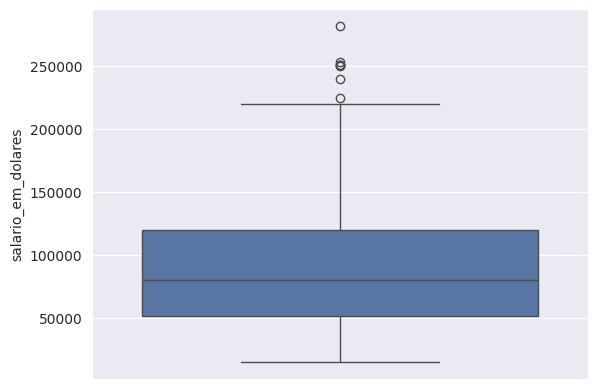

In [28]:
sns.boxplot(df_junior['salario_em_dolares'])

In [29]:
# Lista dos salários dos juniores.
salario_junior = df_junior['salario_em_dolares']

In [30]:
junior_outliers = calculo_outliers(salario_junior)
print(junior_outliers)

Limites: [-50685.0 - 222411.0]
[240000, 250800, 281700, 252990, 250800, 250800, 250000, 225000]


Pelo cálculo IQR, são outliers aqueles juniores que recebem valores maiores que $222.411,00 dólares anuais. A priori, irei separar os outliers para analisá-los separadamente.

In [31]:
# Divisão de todos os juniores em dois grupos: juniores sem os outliers e juniores que são os outliers.
df_junior_sem_outliers = df_junior[~df_junior['salario_em_dolares'].isin(junior_outliers)]
df_junior_outliers = df_junior[df_junior['salario_em_dolares'].isin(junior_outliers)]

In [32]:
print(f'O número de juniores com outliers é: {len(df_junior)}')
print(f'O número de juniores sem outliers é: {len(df_junior_sem_outliers)}')

O número de juniores com outliers é: 496
O número de juniores sem outliers é: 488


###**2.2.1 - Juniores sem Outliers**

In [33]:
df_junior_sem_outliers.head()

,ano_trabalho,nome_cargo,categoria_cargo,moeda_salarial,salario,salario_em_dolares,pais_onde_reside,nivel_experiencia,tipo_contratacao,configuracao_trabalho,localizacao_empresa,tamanho_empresa
15,2023,Data Analyst,Data Analysis,USD,95000,95000,United States,Junior,Full-time,In-person,United States,M
16,2023,Data Analyst,Data Analysis,USD,75000,75000,United States,Junior,Full-time,In-person,United States,M
53,2023,Research Analyst,Data Science and Research,USD,72000,72000,United States,Junior,Full-time,Remote,United States,M
54,2023,Research Analyst,Data Science and Research,USD,64000,64000,United States,Junior,Full-time,Remote,United States,M
63,2023,Data Analyst,Data Analysis,USD,100000,100000,United States,Junior,Full-time,In-person,United States,M


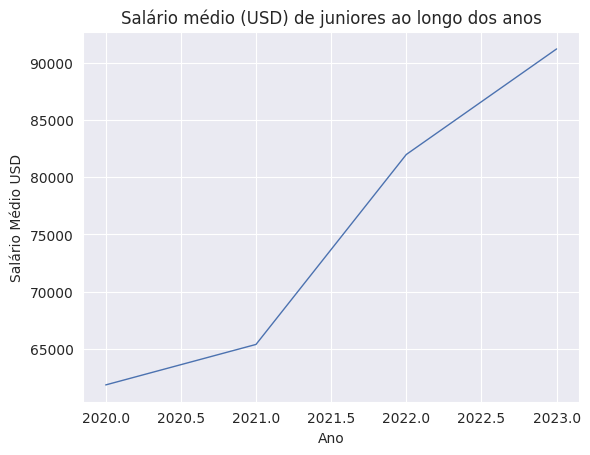

In [34]:
aux = pd.DataFrame(df_junior_sem_outliers.groupby('ano_trabalho')['salario_em_dolares'].mean().reset_index())

# Plotagem
fig = sns.lineplot(data=aux, x='ano_trabalho', y='salario_em_dolares', linewidth=1)

plt.title('Salário médio (USD) de juniores ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Salário Médio USD')
plt.show(fig)

Como no dataset há registros de pessoas trabalhando na área de dados a partir de 2020, observa-se nítidamente **um crescimento dos salários médios na área**.

Mas porque há esse crescimento? há possíveis motivos , por exemplo, a constante influência da importância dos dados na manutenção e favorecimento de lucros nas empresas, aceleramento precoce da área de tecnologia pelo escalamento da pandemia durante os anos de 2020/2 - 2021 - 2022.

Text(0.5, 0, 'Mediana Salarial')

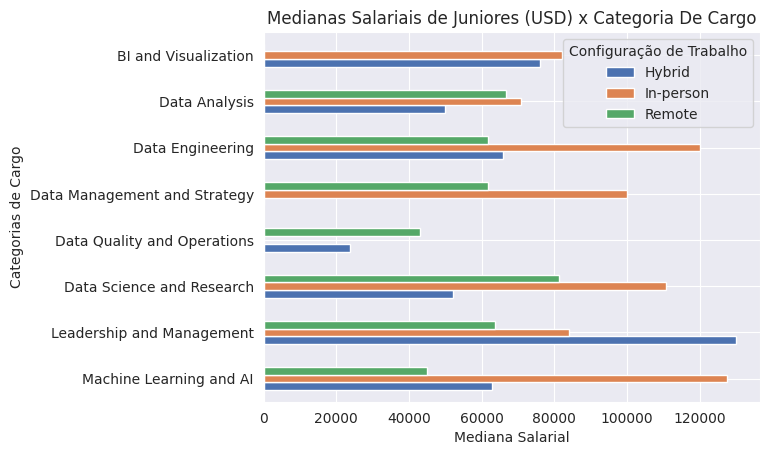

In [35]:
grafico_junior = df_junior_sem_outliers.groupby(['categoria_cargo', 'configuracao_trabalho'])['salario_em_dolares'].median().unstack().sort_index(ascending=False)

grafico_junior.plot.barh(title="Medianas Salariais de Juniores (USD) x Categoria De Cargo")

plt.legend(title="Configuração de Trabalho", loc='upper right')
plt.ylabel("Categorias de Cargo")
plt.xlabel("Mediana Salarial")

Com a construção gráfica, é possível detalhar a média salárial dos juniores baseado na categoria do seu cargo e na configuração do trabalho (homeoffice, híbrido ou presencial).

Na questão de ser presencial, a faixa salárial é maior para juniores que atuam na subárea de **Machine Learning e IA, recebendo um salário maior que 120 mil dólares anuais**.

Já sendo híbrido, o maior valor que está em conformidade com a subárea de **liderança e administração, com uma faixa salarial maior que 120 dólares anuais também.**

No que se diz respeito aos trabalhos remotos, a subárea de **pesquisa e ciência de dados leva a maior remuneração média anual, por volta de 80 mil dólares.**

Optei pelo uso da mediana na comparação dos cargos e configurações de trabalho porque no dataset **cada categoria não está dividida em registros de mesma quantidade, oque poderia enviesar a média se fosse realizado comparações entre diferentes quantidades**

###**2.2.2 - Juniores Outliers**

In [36]:
df_junior_outliers.head(10)

,ano_trabalho,nome_cargo,categoria_cargo,moeda_salarial,salario,salario_em_dolares,pais_onde_reside,nivel_experiencia,tipo_contratacao,configuracao_trabalho,localizacao_empresa,tamanho_empresa
814,2023,Data Integration Specialist,Data Management and Strategy,USD,240000,240000,United States,Junior,Full-time,Remote,United States,M
934,2023,Research Scientist,Data Science and Research,USD,250800,250800,United States,Junior,Full-time,In-person,United States,M
1156,2023,Applied Scientist,Data Science and Research,USD,281700,281700,United States,Junior,Full-time,In-person,United States,M
3038,2023,Research Scientist,Data Science and Research,USD,252990,252990,United States,Junior,Full-time,Remote,United States,M
4221,2023,Research Scientist,Data Science and Research,USD,250800,250800,United States,Junior,Full-time,In-person,United States,M
4223,2023,Research Scientist,Data Science and Research,USD,250800,250800,United States,Junior,Full-time,In-person,United States,M
9177,2020,Machine Learning Engineer,Machine Learning and AI,USD,250000,250000,United States,Junior,Full-time,Hybrid,United States,L
9191,2021,Machine Learning Scientist,Machine Learning and AI,USD,225000,225000,United States,Junior,Full-time,Remote,United States,L


Aos outliers, o único padrão visível entre eles é que todos:
 - residem nos EUA
 - recebem em dólares
 - trabalham em tempo integral

Não há uma similaridade no restante, oque pode explicar essa diferença do restante dos dados são possíveis habilidades incomuns entre esses profissionais, podem estar concentrados em uma área do país que os valorizou. Uma rápida pesquisa no google, observamos que a média via GLASSDOOR é entre 169k-216k de dólares.

In [37]:
print(f'A mediana dos outliers juniores é: {df_junior_outliers["salario_em_dolares"].median()} (USD)')
print(f'A média dos outliers juniores é:  {df_junior_outliers["salario_em_dolares"].mean()} (USD)')

A mediana dos outliers juniores é: 250800.0 (USD)
A média dos outliers juniores é:  250261.25 (USD)


Supondo que a média salarial da área seja de 216 mil dólares, temos que a *média salarial dos outliers que pertencem ao nível de experiência junior, são de cerca de 15,86% maiores que o comum*.

##**2.3 - Análise Salarial dos Plenos**

In [38]:
df_pleno = dt.loc[dt['nivel_experiencia'] == 'Pleno']

In [39]:
len(df_pleno)

1869

<Axes: ylabel='salario_em_dolares'>

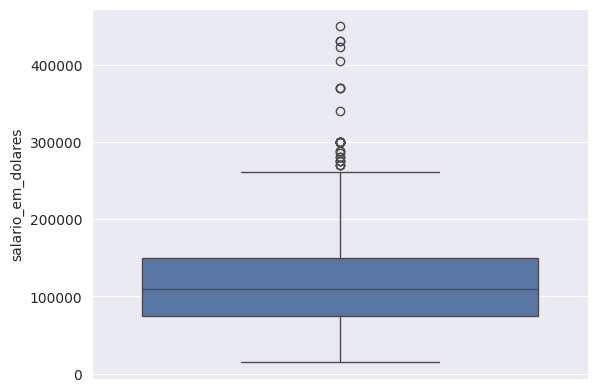

In [40]:
sns.boxplot(df_pleno['salario_em_dolares'])

In [41]:
print(f'A mediana dos salários dos plenos em dólares é: {df_pleno["salario_em_dolares"].median()}')

A mediana dos salários dos plenos em dólares é: 110000.0


In [42]:
df_pleno['salario_em_dolares'].describe()

count      1869.000000
mean     117523.918138
std       55453.622208
min       15000.000000
25%       75000.000000
50%      110000.000000
75%      149600.000000
max      450000.000000
Name: salario_em_dolares, dtype: float64

In [43]:
salario_pleno = list(df_pleno['salario_em_dolares'])

In [44]:
pleno_outliers = calculo_outliers(salario_pleno)
len(pleno_outliers)

Limites: [-36900.0 - 261500.0]


30

Plenos que recebem **acima de 261.500 dólares anuais** são considerados como Outliers.

In [45]:
# Separação dos Outliers do dataframe dos plenos.
df_plenos_sem_outliers =  df_pleno[~df_pleno['salario_em_dolares'].isin(pleno_outliers)]
df_plenos_outliers = df_pleno[df_pleno['salario_em_dolares'].isin(pleno_outliers)]

print(len(df_plenos_sem_outliers))
print(len(df_plenos_outliers))

1839
30


###**2.3.1 - Plenos Sem Outliers**

In [46]:
aux = pd.DataFrame(df_plenos_sem_outliers.groupby('ano_trabalho')['salario_em_dolares'].mean().reset_index())

Text(0, 0.5, 'salario médio (usd)')

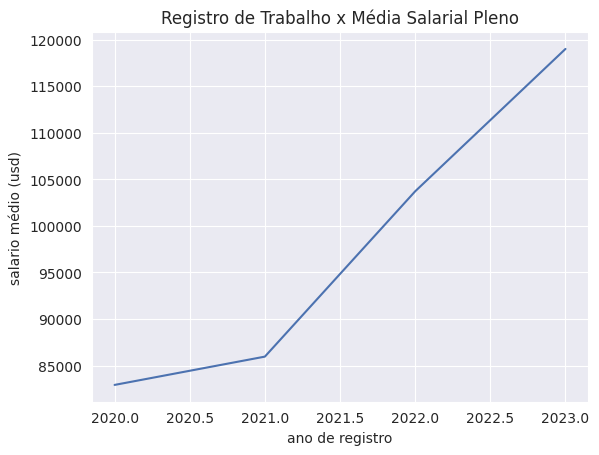

In [47]:
sns.lineplot(data=aux, x='ano_trabalho', y='salario_em_dolares')

plt.title('Registro de Trabalho x Média Salarial Pleno')
plt.xlabel('ano de registro')
plt.ylabel('salario médio (usd)')

A média salarial para o nível pleno aumentou consideravelmente ao longo dos anos. Vamos realizar um teste de hipótese para averiguar essa sentença.

In [48]:
anos = df_plenos_sem_outliers['ano_trabalho'].unique()
anos = anos.sort()

Text(0, 0.5, 'salário em dólares')

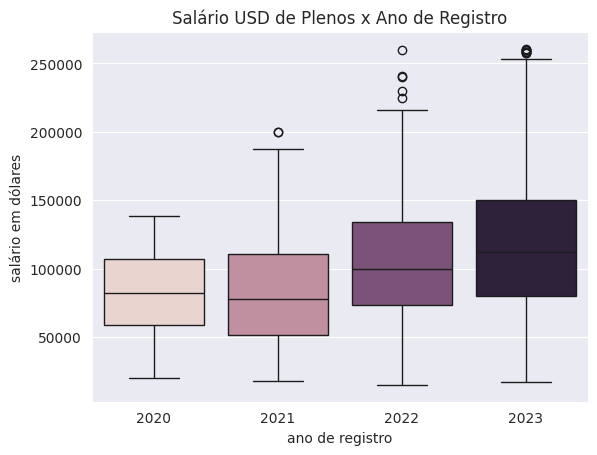

In [49]:
sns.boxplot(data=df_plenos_sem_outliers, x='ano_trabalho', y='salario_em_dolares', order=anos, hue='ano_trabalho', legend=False)

plt.title('Salário USD de Plenos x Ano de Registro')
plt.xlabel('ano de registro')
plt.ylabel('salário em dólares')

- *H0:* As médias dos salários de plenos são iguais para todos os anos de registro

- *Hipótese Alternativa:* As médias salariais para plenos aumentaram ao longo dos anos.

*Significância de 5% e desvios-padrão diferentes e desconhecidos*

In [50]:
# Separação dos dados por ano para a realização dos testes T

df_pleno_2020 = df_plenos_sem_outliers.loc[df_plenos_sem_outliers['ano_trabalho'] == 2020, 'salario_em_dolares']
df_pleno_2021 = df_plenos_sem_outliers.loc[df_plenos_sem_outliers['ano_trabalho'] == 2021, 'salario_em_dolares']
df_pleno_2022 = df_plenos_sem_outliers.loc[df_plenos_sem_outliers['ano_trabalho'] == 2022, 'salario_em_dolares']
df_pleno_2023 = df_plenos_sem_outliers.loc[df_plenos_sem_outliers['ano_trabalho'] == 2023, 'salario_em_dolares']

Serão feitos três testes:
  
  - Se a média de 2021 é maior que a média de 2020;
  
  - Se a média de 2023 é maior que a média de 2022;
  
  - Ao olho nu, a média salarial de 2021 parece ter diminuido em relação à média de 2020, caso isso seja comprovado, será feito o terceiro teste:
    - Se a média de 2022 for maior que a média de 2020, então mesmo com um decréscimo da média do ano de 2020 para o ano de 2021, os salários cresceram novamente.

In [51]:
teste_2021_2020 = stats.ttest_ind(df_pleno_2021, df_pleno_2020, equal_var=False)
print(teste_2021_2020[1])

teste_2023_2022 = stats.ttest_ind(df_pleno_2023, df_pleno_2022, equal_var=False)
print(teste_2023_2022[1])

teste_2022_2020 = stats.ttest_ind(df_pleno_2022, df_pleno_2020, equal_var=False)
print(teste_2022_2020[1])

0.7034015035464531
2.5397934781883444e-08
0.0028405325530505283


Os resultados, em sua respectiva ordem nos trás, estatisticamente falando, as seguintes informações:

  - O p-value é maior que 0,05. Logo, não rejeitamos a hipótese nula de que as médias entre os anos de 2020 e 2021 são iguais.

  - O p-value é menor que 0,05. Logo, rejeitamos a hipótese nula de que as médias entre os anos de 2020 e 2021 são iguais e aceitamos a hipótese alternativa de que houve um aumento na média salárial entre os anos de  2022 e 2023.

  - O p-value é menor que 0,05. Logo, rejeitamos a hipótese nula de que as médias entre os anos de 2020 e 2021 são iguais e aceitamos a hipótese alternativa de que houve um aumento na média salárial entre os anos de 2020 e 2022.

Assim, **podemos afirmar com embasamento no teste T que a média salárial no nível pleno aumentou conforme os anos de registro.**

Text(0.5, 0, 'Mediana Salarial')

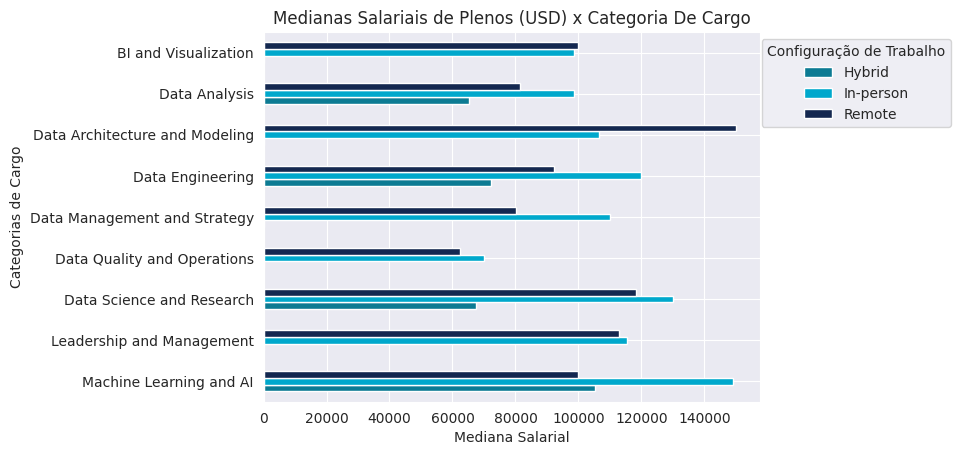

In [52]:
grafico_pleno = df_plenos_sem_outliers.groupby(['categoria_cargo', 'configuracao_trabalho'])['salario_em_dolares'].median().unstack().sort_index(ascending=False)

cores = ['#0C7B93', '#00A8CC', '#142850']

grafico_pleno.plot.barh(title="Medianas Salariais de Plenos (USD) x Categoria De Cargo", color=cores)

plt.legend(title="Configuração de Trabalho", loc='upper right', bbox_to_anchor=(1.4,1))
plt.ylabel("Categorias de Cargo")
plt.xlabel("Mediana Salarial")

###**2.3.2 - Plenos Outliers**

In [53]:
df_plenos_outliers['salario_em_dolares'].describe()

count        30.000000
mean     321422.233333
std       55993.692828
min      270000.000000
25%      281775.000000
50%      300000.000000
75%      361840.000000
max      450000.000000
Name: salario_em_dolares, dtype: float64

O salário máximo é de 450.000 dólares anuais, já o mínimo dentre os outliers é de 270.000 dólares anuais.

In [54]:
df_plenos_outliers.head()

,ano_trabalho,nome_cargo,categoria_cargo,moeda_salarial,salario,salario_em_dolares,pais_onde_reside,nivel_experiencia,tipo_contratacao,configuracao_trabalho,localizacao_empresa,tamanho_empresa
659,2023,Machine Learning Engineer,Machine Learning and AI,USD,300000,300000,United States,Pleno,Full-time,In-person,United States,M
1296,2023,Research Engineer,Data Science and Research,USD,300000,300000,United States,Pleno,Full-time,In-person,United States,M
1298,2023,Research Engineer,Data Science and Research,USD,300000,300000,United States,Pleno,Full-time,In-person,United States,M
1503,2023,Analytics Engineer,Leadership and Management,GBP,300000,369120,United Kingdom,Pleno,Full-time,In-person,United Kingdom,M
1694,2023,Machine Learning Engineer,Machine Learning and AI,USD,285000,285000,United States,Pleno,Full-time,In-person,United States,L


In [55]:
aux2 = df_plenos_outliers.loc[:, ['moeda_salarial', 'salario', 'salario_em_dolares', 'pais_onde_reside']]
aux2.loc[aux2['moeda_salarial'] == 'GBP', ['salario', 'salario_em_dolares']]

,salario,salario_em_dolares
1503,300000,369120
1932,300000,369120
1946,300000,369120
5702,350000,430640
7683,350000,430967


Aqui existem 6 pessoas dentre as 30 consideradas como Outliers que recebem 300k-350k de **libras esterlinas**, que durante a análise global em dólares são convertidos para salários exorbitantes, principalmente para plenos.

Uma rápida pesquisa no google, nos traz uma perspectiva que no nível pleno (mid-level) recebem na faixa de 64k-102k libras esterlinas. Logo, esses salários são altíssimos em comparação com a média do país.

In [56]:
aux2.loc[aux2['moeda_salarial'] == 'USD', ['salario', 'salario_em_dolares']]

,salario,salario_em_dolares
659,300000,300000
1296,300000,300000
1298,300000,300000
1694,285000,285000
1696,405000,405000
1697,270000,270000
1737,300000,300000
1813,275000,275000
2136,300000,300000
2870,300000,300000


Após uma consulta em sites como Linkedin, Glassdoor, Indeed, a faixa salarial para os EUA no mid-level (pleno) é na faixa de 132k-210k de dólares.

Se aprofundarmos nessa análise, esses salários altos correspondem à empresas multinacionais como a Meta, detentora de redes sociais, Google, etc.

Para tal análise, vamos realizar uma correlação entre essas duas variáveis. Como o tamanho da empresa é uma var. qualitativa, vamos considerar o seguinte:

  - 1: empresas pequenas / small companies
  - 2: empresas médias / medium companies
  - 3: empresas grandes / large companies

In [57]:
df_plenos_outliers.loc[:, 'tamanho_empresa'] = df_plenos_outliers['tamanho_empresa'].map({'S': '1', 'M': '2', 'L': '3'})

# A coluna 'tamanho_empresa' era do tipo obj, vamos converte-la para int e calcular uma possível correlação.
df_plenos_outliers['tamanho_empresa'] = df_plenos_outliers['tamanho_empresa'].astype(int)
df_plenos_outliers

<ipython-input-57-63877da41553>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plenos_outliers['tamanho_empresa'] = df_plenos_outliers['tamanho_empresa'].astype(int)


,ano_trabalho,nome_cargo,categoria_cargo,moeda_salarial,salario,salario_em_dolares,pais_onde_reside,nivel_experiencia,tipo_contratacao,configuracao_trabalho,localizacao_empresa,tamanho_empresa
659,2023,Machine Learning Engineer,Machine Learning and AI,USD,300000,300000,United States,Pleno,Full-time,In-person,United States,2
1296,2023,Research Engineer,Data Science and Research,USD,300000,300000,United States,Pleno,Full-time,In-person,United States,2
1298,2023,Research Engineer,Data Science and Research,USD,300000,300000,United States,Pleno,Full-time,In-person,United States,2
1503,2023,Analytics Engineer,Leadership and Management,GBP,300000,369120,United Kingdom,Pleno,Full-time,In-person,United Kingdom,2
1694,2023,Machine Learning Engineer,Machine Learning and AI,USD,285000,285000,United States,Pleno,Full-time,In-person,United States,3
1696,2023,Research Scientist,Data Science and Research,USD,405000,405000,United States,Pleno,Full-time,In-person,United States,3
1697,2023,Research Scientist,Data Science and Research,USD,270000,270000,United States,Pleno,Full-time,In-person,United States,3
1737,2023,Research Scientist,Data Science and Research,USD,300000,300000,United States,Pleno,Full-time,In-person,United States,2
1813,2023,Data Engineer,Data Engineering,USD,275000,275000,Canada,Pleno,Full-time,In-person,Canada,2
1932,2023,AI Engineer,Machine Learning and AI,GBP,300000,369120,United Kingdom,Pleno,Full-time,In-person,United Kingdom,2


In [58]:
correlacao = df_plenos_outliers['tamanho_empresa'].corr(df_plenos_outliers['salario'])
print("Correlação entre tamanho da empresa e salário:", correlacao)

Correlação entre tamanho da empresa e salário: 0.14750783325614017


A correlação é **fraca e positiva**, isso indica que há uma baixa tendência de, à medida que o tamanho da empresa aumenta, o salário tende a aumentar um pouco. Entretanto, outros fatores como: habilidades específicas, tempo de experiência no cargo, etc influenciam esses valores altos dos salários e só o tamanho da empresa **não é forte o suficiente para assegurar essa tendência**.

##**2.4 - Análise Salarial dos Seniores**

In [59]:
df_senior = dt.loc[dt['nivel_experiencia'] == 'Senior']
df_senior.head()

,ano_trabalho,nome_cargo,categoria_cargo,moeda_salarial,salario,salario_em_dolares,pais_onde_reside,nivel_experiencia,tipo_contratacao,configuracao_trabalho,localizacao_empresa,tamanho_empresa
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
5,2023,Data Scientist,Data Science and Research,USD,130000,130000,United States,Senior,Full-time,Remote,United States,M


In [60]:
len(df_senior)

6709

<Axes: ylabel='salario_em_dolares'>

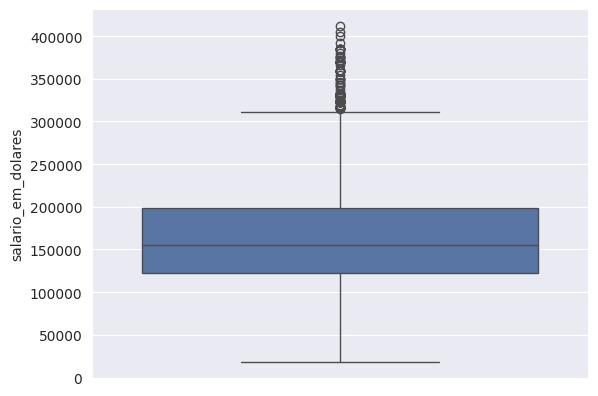

In [61]:
sns.boxplot(df_senior['salario_em_dolares'])

O boxplot dos salários em dólares dos seniores acusa muitos outliers.

In [62]:
salario_senior = df_senior['salario_em_dolares'].values
salario_senior_outliers = calculo_outliers(salario_senior)

Limites: [8300.0 - 313100.0]


Outliers no nível Senior são aqueles cujo valores extrapolam 313.100 dólares anuais.

In [63]:
# Separação dos outliers.
df_senior_sem_outliers = df_senior.loc[~df_senior['salario_em_dolares'].isin(salario_senior_outliers)]
df_senior_outliers = df_senior.loc[df_senior['salario_em_dolares'].isin(salario_senior_outliers)]

###**2.4.1 - Seniores Sem Outliers**

In [64]:
aux = pd.DataFrame(df_senior_sem_outliers.groupby('ano_trabalho')['salario_em_dolares'].mean().reset_index())

Text(0, 0.5, 'salario médio (usd)')

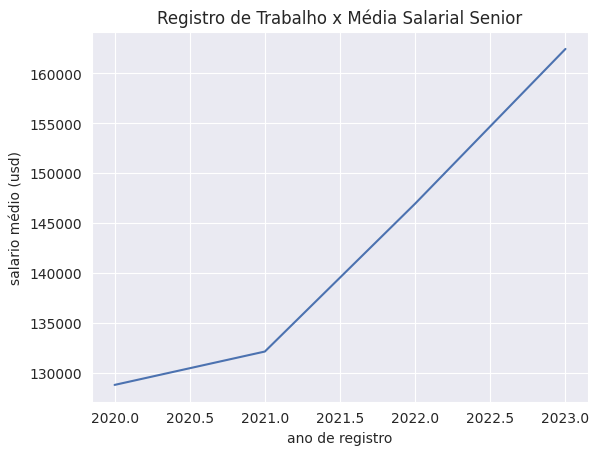

In [65]:
sns.lineplot(data=aux, x='ano_trabalho', y='salario_em_dolares')

plt.title('Registro de Trabalho x Média Salarial Senior')
plt.xlabel('ano de registro')
plt.ylabel('salario médio (usd)')

Visualmente falando, a tendência é que a média salarial dos seniores que não fazem parte dos Outliers também cresce consideravelmente ao longo dos anos. Para confirmar essa informação, é possível realizar os testes de hipótese.

Text(0, 0.5, 'salário em dólares')

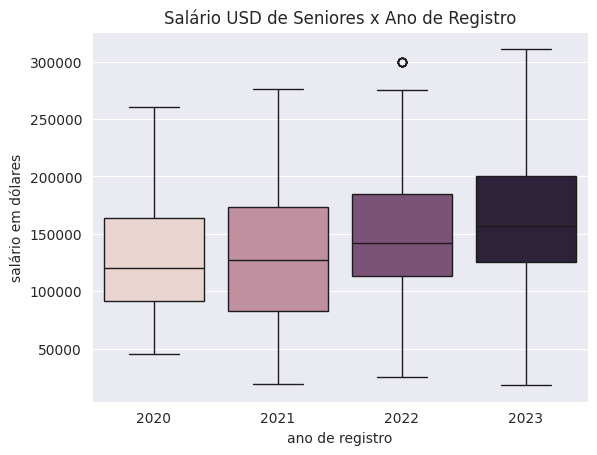

In [66]:
sns.boxplot(data=df_senior_sem_outliers, x='ano_trabalho', y='salario_em_dolares', order=anos, hue='ano_trabalho', legend=False)

plt.title('Salário USD de Seniores x Ano de Registro')
plt.xlabel('ano de registro')
plt.ylabel('salário em dólares')

**Teste de hipótese seniores**

- *H0:* As médias salariais para os seniores não aumentam ao longo dos anos de registro.

- *Hipótese Alternativa:* As médias salariais aumentam conforme os anos passam.

*Obs: nível de significância de 5% e desvios-padrão diferentes desconhecidos*

In [67]:
# Separação dos dados por ano para a realização dos testes T

df_senior_2020 = df_senior_sem_outliers.loc[df_senior_sem_outliers['ano_trabalho'] == 2020, 'salario_em_dolares']
df_senior_2021 = df_senior_sem_outliers.loc[df_senior_sem_outliers['ano_trabalho'] == 2021, 'salario_em_dolares']
df_senior_2022 = df_senior_sem_outliers.loc[df_senior_sem_outliers['ano_trabalho'] == 2022, 'salario_em_dolares']
df_senior_2023 = df_senior_sem_outliers.loc[df_senior_sem_outliers['ano_trabalho'] == 2023, 'salario_em_dolares']

Três testes serão realizados:

- se a média salarial de 2021 é maior que a de 2020;

- se a média salarial de 2022 é maior que a de 2021;

- se a média salarial de 2023 é maior que a de 2022;

Caso todas sejam verdadeiras, isso implica que a média salarial aumentou ao passar dos anos.

In [68]:
teste_2021_2020 = stats.ttest_ind(df_senior_2021, df_senior_2020, equal_var=False)
print(teste_2021_2020[1])

teste_2023_2022 = stats.ttest_ind(df_senior_2023, df_senior_2022, equal_var=False)
print(teste_2023_2022[1])

teste_2022_2020 = stats.ttest_ind(df_senior_2022, df_senior_2020, equal_var=False)
print(teste_2022_2020[1])

0.835335521266905
8.960479484375769e-20
0.21867381406302375


Os resultados confirmam a nossa hipótese nula (H0) já que para todos os testes feitos, o valor está acima do p-value de 0,05.

Logo, isso corrobora a ideia de que a **média salarial dos seniores aumentou durante os anos de registro.**

###**2.4.2 - Seniores Outliers**

In [69]:
df_senior_outliers['salario_em_dolares'].describe()

count       106.000000
mean     345791.867925
std       24524.219031
min      315000.000000
25%      324000.000000
50%      331640.000000
75%      370000.000000
max      412000.000000
Name: salario_em_dolares, dtype: float64

O menor salário de um sênior considerado como Outlier pelos limites IQR é de 315.000 dólares. Já o maior é de 412.00 dólares.

In [70]:
df_senior_outliers.head()

,ano_trabalho,nome_cargo,categoria_cargo,moeda_salarial,salario,salario_em_dolares,pais_onde_reside,nivel_experiencia,tipo_contratacao,configuracao_trabalho,localizacao_empresa,tamanho_empresa
263,2023,Machine Learning Engineer,Machine Learning and AI,USD,319000,319000,United States,Senior,Full-time,Remote,United States,M
415,2023,ML Engineer,Machine Learning and AI,USD,331640,331640,United States,Senior,Full-time,In-person,United States,M
515,2023,ML Engineer,Machine Learning and AI,USD,336300,336300,United States,Senior,Full-time,In-person,United States,M
537,2023,Research Scientist,Data Science and Research,USD,323300,323300,United States,Senior,Full-time,In-person,United States,M
589,2023,Machine Learning Engineer,Machine Learning and AI,USD,324000,324000,United States,Senior,Full-time,In-person,United States,M


In [71]:
aux2 = df_senior_outliers.loc[:, ['moeda_salarial', 'salario', 'salario_em_dolares', 'pais_onde_reside']]
print(f'Quantidade de pessoas seniores consideradas outliers: {aux2.shape[0]}')

aux2 = aux2.loc[aux2['moeda_salarial'] != 'USD', ['moeda_salarial', 'salario', 'salario_em_dolares', 'pais_onde_reside']]
print(f'Quantidade de pessoas seniores que são outliers mas não recebem em dólares: {aux2.shape[0]}')
aux2

Quantidade de pessoas seniores consideradas outliers: 106
Quantidade de pessoas seniores que são outliers mas não recebem em dólares: 2


,moeda_salarial,salario,salario_em_dolares,pais_onde_reside
4938,GBP,325000,399880,United Kingdom
5480,EUR,300000,323905,France


Dentre 106 indivíduos considerados Outliers, há apenas 2 que não recebem em dólar.

Nesses países, de acordo com o Glassdoor, a faixa salarial em grandes empresas como Amazon, Facebook, Microsoft é por volta de 120k de euros. O que evidencia como é muito discrepante os salários dessas pessoas, confirmando que são outliers.

### **Gráfico dos Seniores: Mediana Salarial dos Seniores x Cargo**

Text(0.5, 0, 'Mediana Salarial')

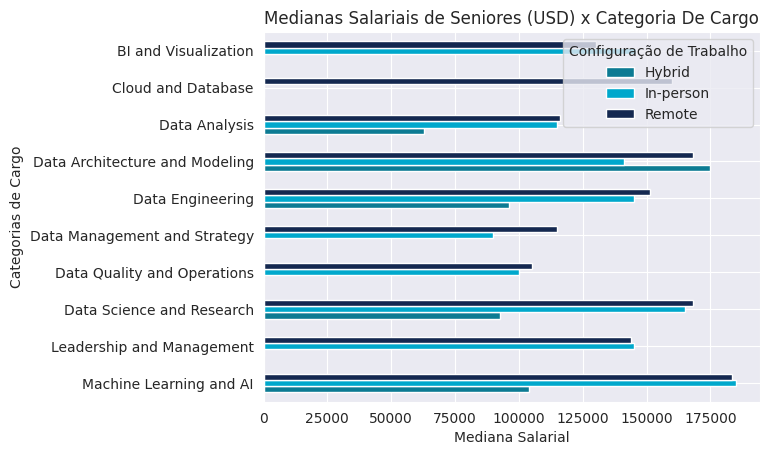

In [103]:
grafico_senior = df_senior_sem_outliers.groupby(['categoria_cargo', 'configuracao_trabalho'])['salario_em_dolares'].median().unstack().sort_index(ascending=False)

grafico_senior.plot.barh(title="Medianas Salariais de Seniores (USD) x Categoria De Cargo", color=cores)

plt.legend(title="Configuração de Trabalho", loc='upper right')
plt.ylabel("Categorias de Cargo")
plt.xlabel("Mediana Salarial")

##**2.5 - Análise Salarial dos Executivos**

In [85]:
df_executivo = dt.loc[dt['nivel_experiencia'] == 'Executivo']
df_executivo.head()

,ano_trabalho,nome_cargo,categoria_cargo,moeda_salarial,salario,salario_em_dolares,pais_onde_reside,nivel_experiencia,tipo_contratacao,configuracao_trabalho,localizacao_empresa,tamanho_empresa
9,2023,Data Engineer,Data Engineering,USD,210000,210000,United States,Executivo,Full-time,Remote,United States,M
10,2023,Data Engineer,Data Engineering,USD,168000,168000,United States,Executivo,Full-time,Remote,United States,M
290,2023,Data Engineer,Data Engineering,USD,219650,219650,United States,Executivo,Full-time,Remote,United States,M
291,2023,Data Engineer,Data Engineering,USD,136000,136000,United States,Executivo,Full-time,Remote,United States,M
370,2023,Data Analyst,Data Analysis,USD,170000,170000,United States,Executivo,Full-time,In-person,United States,M


In [86]:
len(df_executivo)

281

Há 281 pessoas consideradas como executivas na área de ciência de dados.

<Axes: ylabel='salario_em_dolares'>

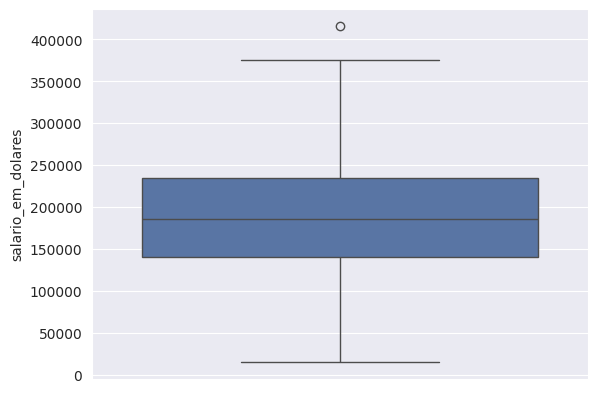

In [87]:
sns.boxplot(df_executivo['salario_em_dolares'])

Apenas 1 valor foi considerado como Outlier pelo intervalo interquartil.

In [92]:
#Cálculo dos Limites IQR
salario_executivo = df_executivo['salario_em_dolares'].values
salario_executivo_outlier = calculo_outliers(salario_executivo)

Limites: [-2500.0 - 377500.0]


Há uma pessoa dentre os executivos que recebe 416.000 usd.

### **2.5.1. Executivos Sem Outliers.**

In [93]:
#Separação dos salários Outliers dos executivos.
df_executivo_sem_outliers = df_executivo.loc[~df_executivo['salario_em_dolares'].isin(salario_executivo_outlier)]

In [94]:
# Criação de um dataframe para visualizar as médias salariais dos executivos em relação ao ano de trabalho.
aux = pd.DataFrame(df_executivo_sem_outliers.groupby('ano_trabalho')['salario_em_dolares'].mean().reset_index())

Text(0, 0.5, 'salario médio (usd)')

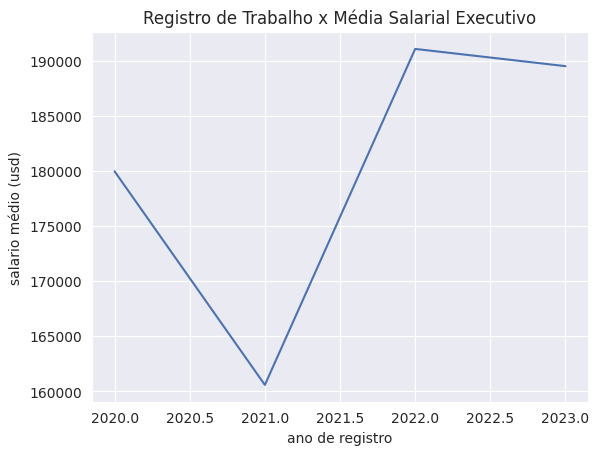

In [95]:
#Plotagem

sns.lineplot(data=aux, x='ano_trabalho', y='salario_em_dolares')

plt.title('Registro de Trabalho x Média Salarial Executivo')
plt.xlabel('ano de registro')
plt.ylabel('salario médio (usd)')

Visualmente falando, vemos uma queda acentuada de 2020 para o ano de 2021, oque pode ter sido influenciado pela pandemia do Covid-19 que trouxe falência à empresas, desemprego e redução salarial. Entretanto, de 2021 para 2022 houve um salto grande, com um aumento de  mais de 30 mil dólares nos salários médios dos executivos da área da ciência de dados.

Text(0, 0.5, 'salário em dólares')

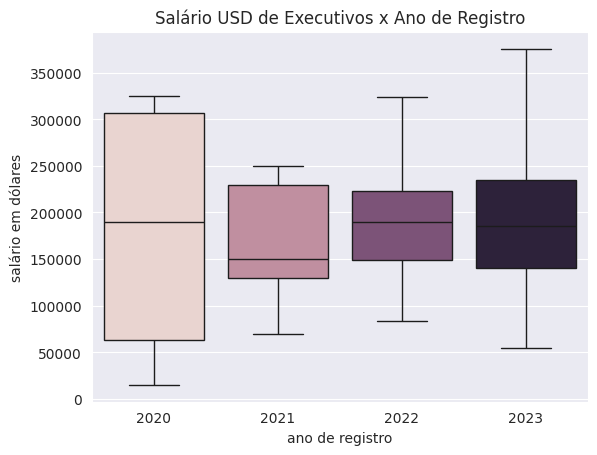

In [96]:
sns.boxplot(data=df_executivo_sem_outliers, x='ano_trabalho', y='salario_em_dolares', order=anos, hue='ano_trabalho', legend=False)

plt.title('Salário USD de Executivos x Ano de Registro')
plt.xlabel('ano de registro')
plt.ylabel('salário em dólares')

É nítido que o **número de contratações de executivos na área de dados foi muito maior no ano de 2020** e também observa-se a variação entre as médias salariais para cada boxplot.

### **2.5.2. Executivo Outlier**

In [97]:
df_executivo_com_outliers = df_executivo.loc[df_executivo['salario_em_dolares'].isin(salario_executivo_outlier)]

In [98]:
df_executivo_com_outliers.head()

,ano_trabalho,nome_cargo,categoria_cargo,moeda_salarial,salario,salario_em_dolares,pais_onde_reside,nivel_experiencia,tipo_contratacao,configuracao_trabalho,localizacao_empresa,tamanho_empresa
9287,2021,Principal Data Scientist,Data Science and Research,USD,416000,416000,United States,Executivo,Contract,Remote,United States,S


O único executivo considerado como outlier pelo cálculo IQR é o Cientista de Dados Principal, tem um regime de contrato com a empresa e reside nos Estados Unidos da América, recebendo 416 mil dólares anuais.

### **Gráfico dos Executivos: Relação Mediana Salarial x Cargo Ocupado**

Text(0.5, 0, 'Mediana Salarial')

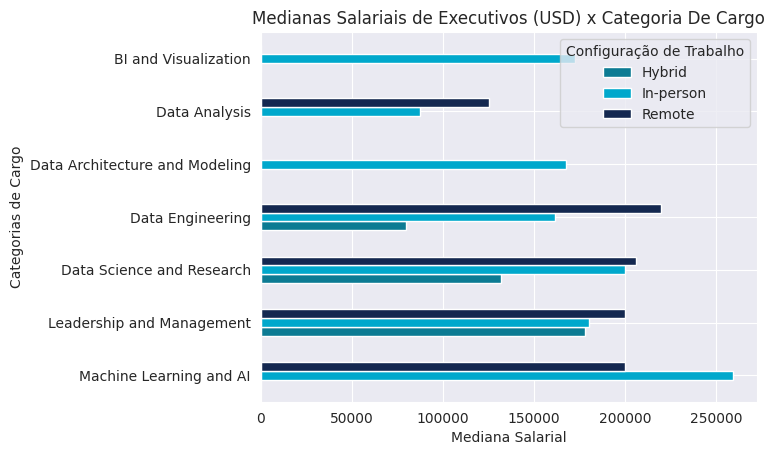

In [101]:
grafico_executivo = df_executivo_sem_outliers.groupby(['categoria_cargo', 'configuracao_trabalho'])['salario_em_dolares'].median().unstack().sort_index(ascending=False)

grafico_executivo.plot.barh(title="Medianas Salariais de Executivos (USD) x Categoria De Cargo", color=cores)

plt.legend(title="Configuração de Trabalho", loc='upper right')
plt.ylabel("Categorias de Cargo")
plt.xlabel("Mediana Salarial")

## **Extra: Mapa Mundi - Salário Médio & Localidade**

In [110]:
# Agrupação dos dados por localização da empresa e calcule a média dos salários em dólares
medias_salariais = dt.groupby('localizacao_empresa')['salario_em_dolares'].mean().reset_index()

# Renomeação da coluna de 'salario_em_dolares' para 'media_salarial'
medias_salariais = medias_salariais.rename(columns={'salario_em_dolares': 'media_salarial'})

In [133]:
#Plotagem.
import plotly.graph_objects as go
import pandas as pd


# Crie o gráfico de mapa coroplético
fig = go.Figure(data=go.Choropleth(
    locations=medias_salariais['localizacao_empresa'],
    z=medias_salariais['media_salarial'],
    locationmode='country names',
    colorscale='inferno',
    colorbar_title='Média Salarial',
))

fig.update_layout(
    title_text='Média Salarial Por País',
    geo=dict(
        showcoastlines=True,  # Mostra as linhas costeiras
    )
)

fig.show()


Podemos notar que a maior média salárial em dólares concentra-se na América Do Norte.